In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
acd = pd.read_csv('datasets\\accident_data.csv')

In [3]:
acd

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
acd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
acd['Latitude'] = acd['Latitude'].fillna(acd['Latitude'].mode()[0])
acd['Longitude'] = acd['Longitude'].fillna(acd['Longitude'].mode()[0])
acd['Road_Surface_Conditions'] = acd['Road_Surface_Conditions'].fillna('unknown road condition')
acd['Road_Type'] = acd['Road_Type'].fillna('unaccounted')
acd['Weather_Conditions'] = acd['Weather_Conditions'].fillna('unaccounted')
acd['Urban_or_Rural_Area'] = acd['Urban_or_Rural_Area'].fillna(acd['Urban_or_Rural_Area'].mode()[0])

In [6]:
acd.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [7]:
acd['Accident Date'] = pd.to_datetime(acd['Accident Date'],dayfirst=True,errors='coerce')

In [8]:
acd.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
dtype: int64

In [9]:
acd['Accident_Severity'] = acd['Accident_Severity'].astype('category')
acd['Latitude'] = acd['Latitude'].astype('category')
acd['Light_Conditions'] = acd['Light_Conditions'].astype('category')
acd['District Area'] = acd['District Area'].astype('category')
acd['Longitude'] = acd['Longitude'].astype('category')
acd['Road_Surface_Conditions'] = acd['Road_Surface_Conditions'].astype('category')
acd['Road_Type'] = acd['Road_Type'].astype('category')
acd['Urban_or_Rural_Area'] = acd['Urban_or_Rural_Area'].astype('category')
acd['Weather_Conditions'] = acd['Weather_Conditions'].astype('category')
acd['Vehicle_Type'] = acd['Vehicle_Type'].astype('category')

In [10]:
acd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            265007 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [11]:
acd['Accident Date'] = acd['Accident Date'].astype('str')
acd.dtypes
acd['Accident Date'] = acd['Accident Date'].str.strip()
acd['Accident Date'] = acd['Accident Date'].str.replace('/','-')

In [12]:
print(type(acd['Accident Date']))

<class 'pandas.core.series.Series'>


In [13]:
acd['Accident Date'] = acd['Accident Date'].str.replace('/','-')

In [14]:
acd['Accident Date'] = pd.to_datetime(acd['Accident Date'],dayfirst=True,errors='coerce')


In [15]:
print(acd['Accident Date'].dtype)

datetime64[ns]


In [16]:
acd['Accident Date'].value_counts()

Accident Date
2021-11-02    685
2021-06-10    680
2019-06-12    678
2019-01-02    676
2021-04-12    667
             ... 
2022-09-01    236
2022-02-12    236
2022-05-04    231
2022-07-02    213
2022-10-01    123
Name: count, Length: 576, dtype: int64

In [17]:
acd['Year'] = acd['Accident Date'].dt.year
acd['Month'] = acd['Accident Date'].dt.month
acd['Day'] = acd['Accident Date'].dt.day
acd['DayOfWeek'] = acd['Accident Date'].dt.day_name()
acd['Hour'] = acd['Accident Date'].dt.hour
acd['Week'] = acd['Accident Date'].dt.isocalendar().week

In [18]:
monthly_accidents = acd.groupby('Month').size()
weekly_accidents = acd.groupby('DayOfWeek').size()
yearly_accidents = acd.groupby('Year').size()
hourly_accidents = acd.groupby('Hour').size()
daily_accidents = acd.groupby('Day').size()

In [19]:
correl = acd[['Year', 'Month', 'Day', 'Hour']].corr()

In [20]:
correl

,Year,Month,Day,Hour
Year,1.000000,-0.001695,0.011601,NaN
Month,-0.001695,1.000000,-0.005926,NaN
Day,0.011601,-0.005926,1.000000,NaN
Hour,NaN,NaN,NaN,NaN


In [21]:
df_2019 = acd[acd['Year'] == 2019]

<h1>Insight No. 1</h1>
<h2>Accidents Over Time</h2>

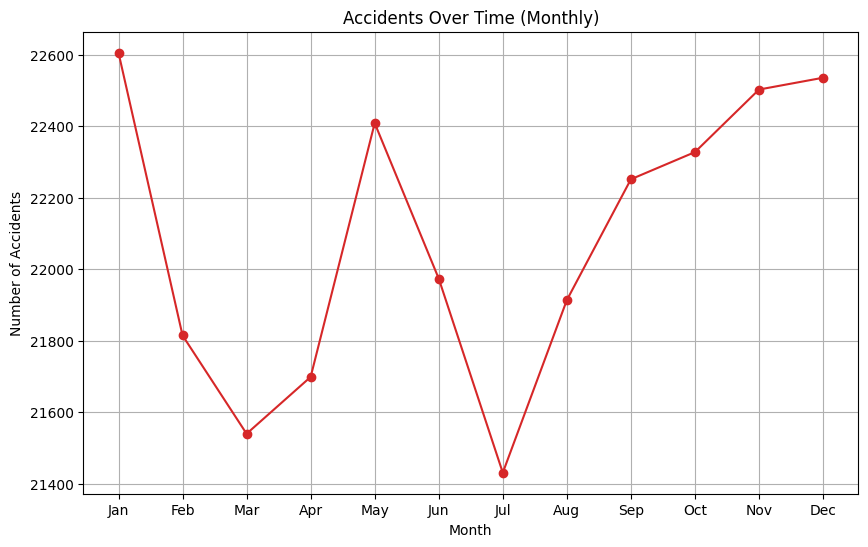

In [22]:

monthly_accidents = acd.groupby(acd['Accident Date'].dt.month).size()


plt.figure(figsize=(10, 6))
plt.plot(monthly_accidents.index, monthly_accidents.values, marker='o', linestyle='-', color='tab:red')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Accidents Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.show()


<h1>Insight No. 2</h1>
<h2>Accident Severity Distribution</h2>

In [23]:
severity_counts = acd['Accident_Severity'].value_counts()
weekly_accidents = acd.groupby('DayOfWeek').size()
yearly_accidents = acd.groupby('Year').size()
hourly_accidents = acd.groupby('Hour').size()
daily_accidents = acd.groupby('Day').size()

<h1> Severity Counts</h1>

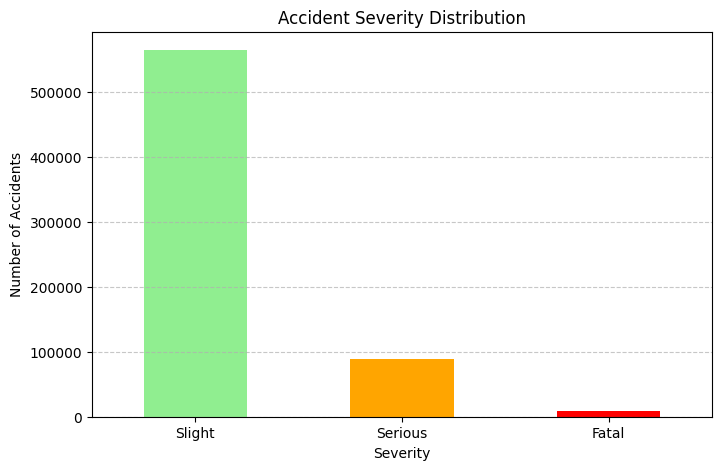

In [24]:
plt.figure(figsize=(8, 5))
severity_counts.plot(kind='bar', color=['lightgreen', 'orange', 'red'])
plt.title('Accident Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<h1>Weekly Accident</h1>

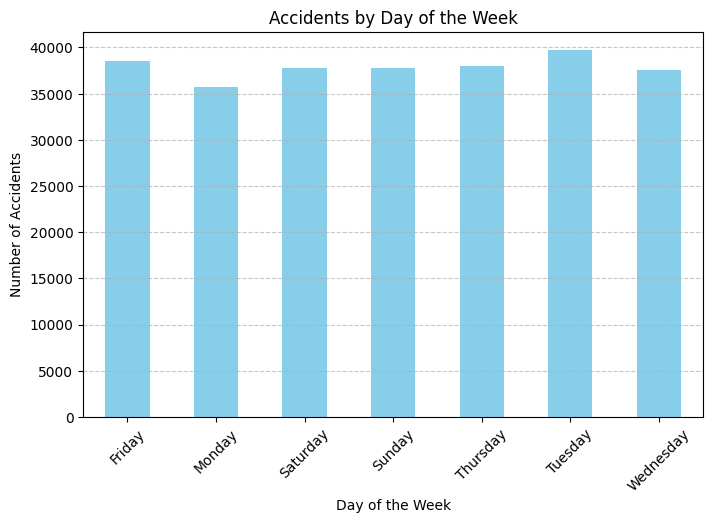

In [25]:
plt.figure(figsize=(8, 5))
weekly_accidents.plot(kind='bar', color='skyblue')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<h1>Yearly Accidents</h1>

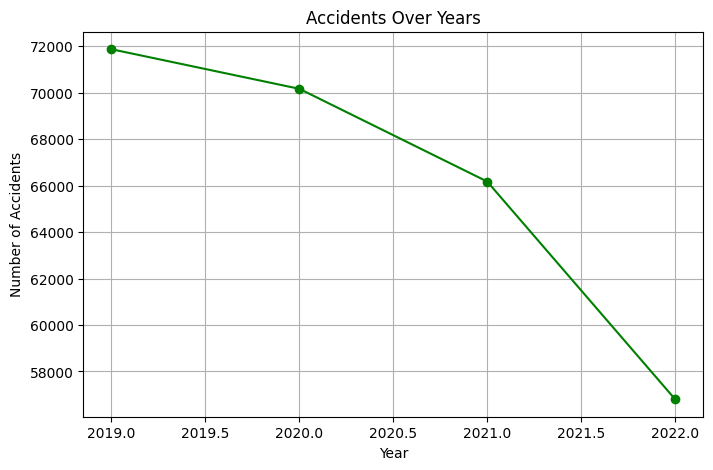

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(yearly_accidents.index, yearly_accidents.values, marker='o', linestyle='-', color='green')
plt.title('Accidents Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.show()


<h1>Hourly Accidents</h1>

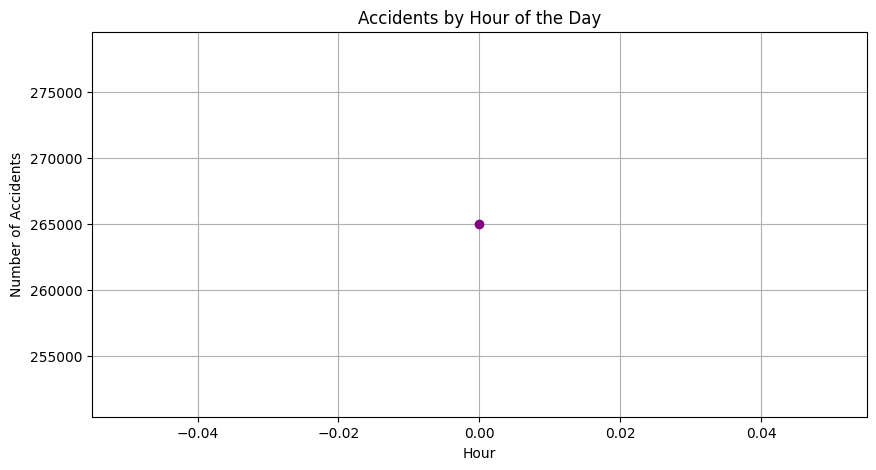

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(hourly_accidents.index, hourly_accidents.values, marker='o', linestyle='-', color='purple')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.show()


<h1>Daily Accidents</h1>

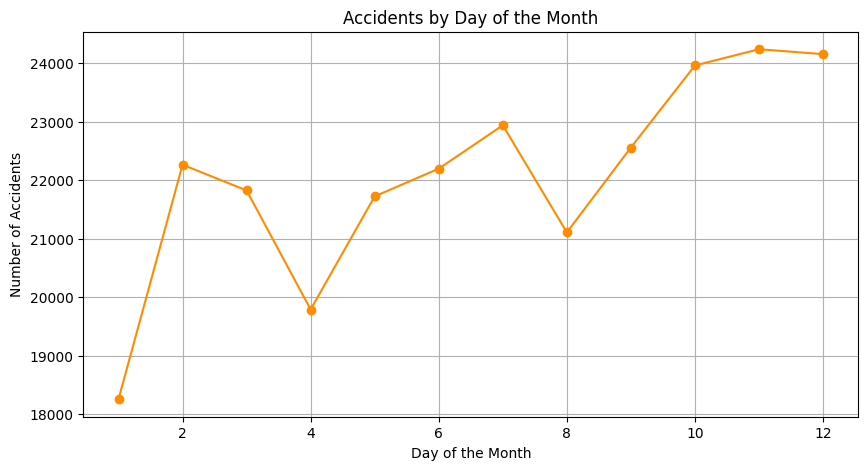

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(daily_accidents.index, daily_accidents.values, marker='o', linestyle='-', color='darkorange')
plt.title('Accidents by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Accidents')
plt.grid(True)

plt.show()


<h1>Insight No. 3</h1>
<h2>Urban vs. Rural Accidents</h2>

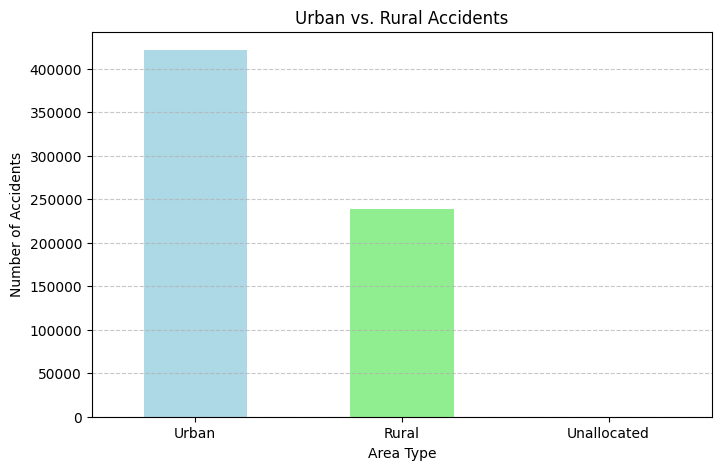

In [40]:
urban_rural_counts = acd['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(8, 5))
urban_rural_counts.plot(kind='bar', color=['lightblue', 'lightgreen', 'gray'])
plt.title('Urban vs. Rural Accidents')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<h1>Insight No. 4</h1>
<h2>Impact of Weather Conditions</h2>

In [ ]:
# acd['Weather_Conditions'].value_counts()

plt.figure(figsize=(10, 6))
acd['Weather_Conditions'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Impact of Weather Conditions on Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<h1>Insight No. 5</h1>
<h2>Number of Vehicles vs. Severity</h2>

In [ ]:
# acd.groupby('Accident_Severity')['Number_of_Vehicles'].describe()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Accident_Severity', y='Number_of_Vehicles', data=acd, palette='Set2')

plt.title('Number of Vehicles vs. Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Vehicles')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<h1>Insight No. 6</h1>
<h2>Average Number of Vehicles Per Accident</h2>

In [ ]:
# acd.groupby('Accident_Severity')['Number_of_Vehicles'].mean()

severity_avg = acd.groupby('Accident_Severity')['Number_of_Vehicles'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Accident_Severity', y='Number_of_Vehicles', data=severity_avg, palette='muted')

plt.title('Average Number of Vehicles Per Accident')
plt.xlabel('Accident Severity')
plt.ylabel('Average Number of Vehicles')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



<h1>Insight No. 7</h1>
<h2>Light Conditions vs. Severity</h2>

In [ ]:
# acd.groupby(['Light_Conditions', 'Accident_Severity']).size().unstack()

light_severity = acd.groupby(['Light_Conditions', 'Accident_Severity']).size().unstack(fill_value=0)

light_severity.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Light Conditions vs Accident Severity')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<h1>Insight No. 8</h1>
<h2> Road Surface Conditions Analysis</h2>

In [ ]:
# acd['Road_Surface_Conditions'].value_counts()


plt.figure(figsize=(10, 5))
sns.countplot(y='Road_Surface_Conditions', data=acd, order=acd['Road_Surface_Conditions'].value_counts().index, palette='Paired')

plt.title('Road Surface Conditions Analysis')
plt.xlabel('Count')
plt.ylabel('Road Surface Conditions')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


<h1>Insight No. 9</h1>
<h2>Urban vs. Rural Accidents</h2>

In [ ]:
# acd['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(8, 5))
sns.countplot(x='Urban_or_Rural_Area', data=acd, palette='coolwarm')

plt.title('Urban vs Rural Accidents')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<h1>Insight No. 10</h1>
<h2>Most Common Accident Locations</h2>

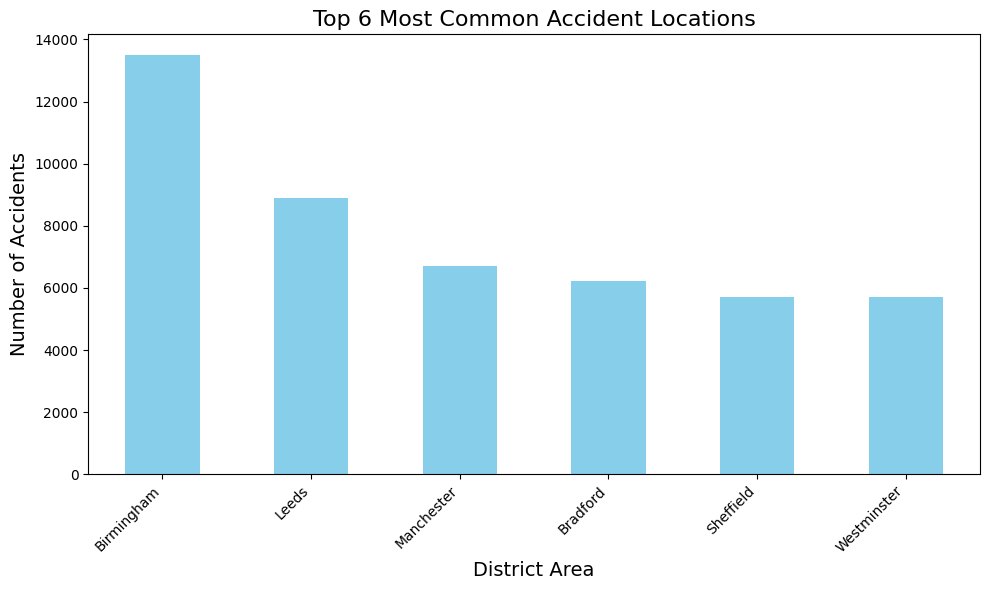

In [37]:
# acd['District Area'].value_counts()



accident_locations = acd['District Area'].value_counts().head(6)  
plt.figure(figsize=(10, 6))
accident_locations.plot(kind='bar', color='skyblue')
plt.title('Top 6 Most Common Accident Locations', fontsize=16)
plt.xlabel('District Area', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()


<h1>Insight No. 11</h1>
<h2>Average Number of Casualties per Accident</h2>

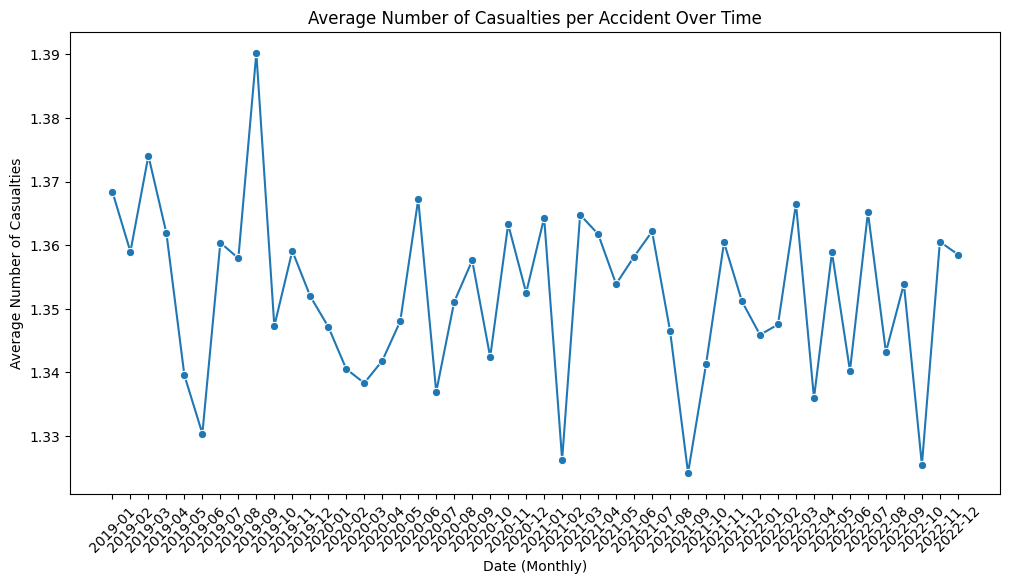

In [36]:
# acd['Number_of_Casualties'].mean()

acd['Accident Date'] = pd.to_datetime(acd['Accident Date'])  
casualties_per_date = acd.groupby(acd['Accident Date'].dt.to_period("M"))['Number_of_Casualties'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=casualties_per_date.index.astype(str), y=casualties_per_date.values, marker="o")
plt.xticks(rotation=45)
plt.xlabel("Date (Monthly)")
plt.ylabel("Average Number of Casualties")
plt.title("Average Number of Casualties per Accident Over Time")
plt.show()


<h1>Insight No. 12</h1>
<h2>Most Common Vehicle Type Involved in Accidents</h2>

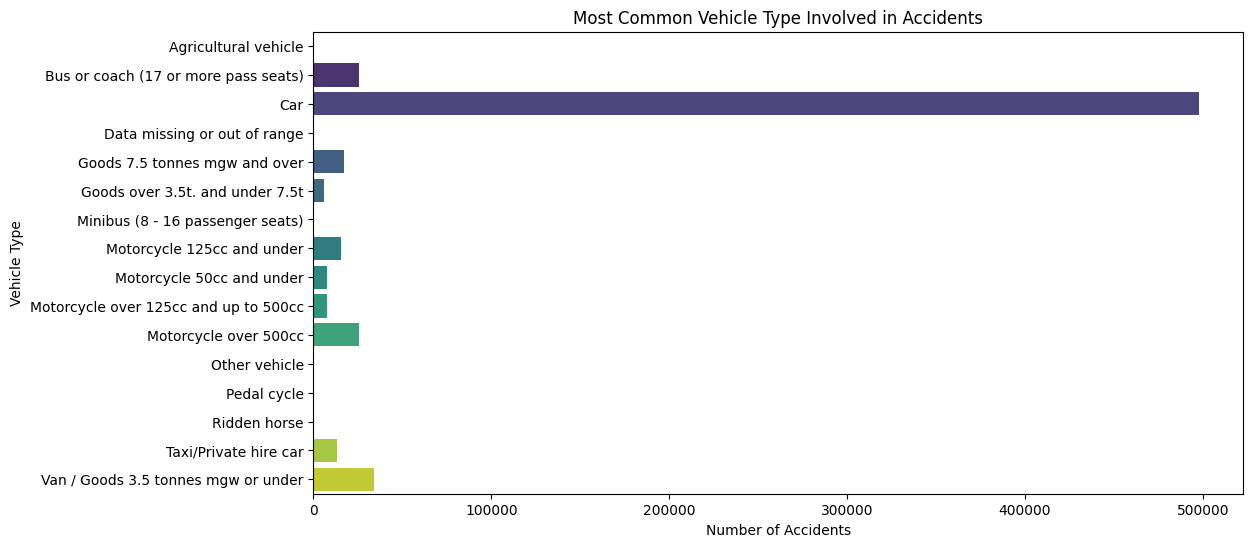

In [34]:
# acd['Vehicle_Type'].value_counts()

vehicle_counts = acd['Vehicle_Type'].value_counts().head(10)  

plt.figure(figsize=(12, 6))
sns.barplot(x=vehicle_counts.values, y=vehicle_counts.index, palette="viridis")
plt.xlabel("Number of Accidents")
plt.ylabel("Vehicle Type")
plt.title("Most Common Vehicle Type Involved in Accidents")
plt.show()

<h1>Insight No. 13</h1>
<h2>Most Dangerous Road Types</h2>

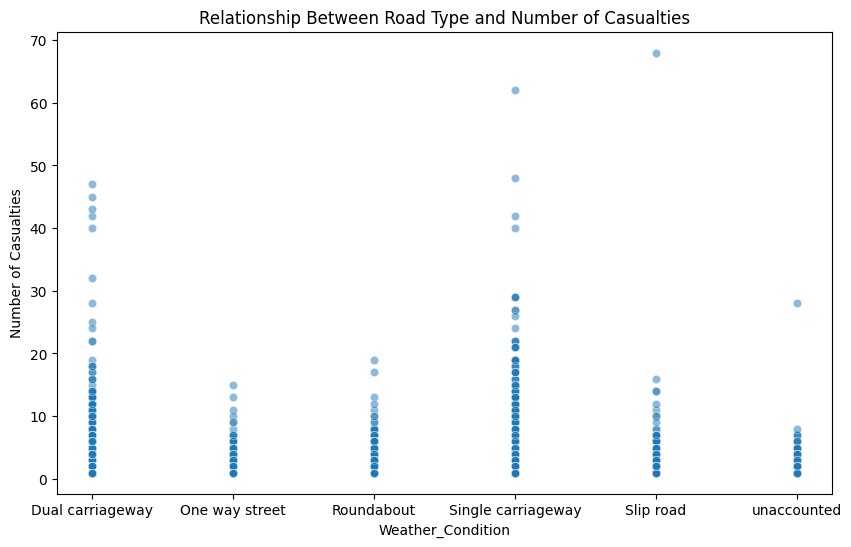

In [45]:
# acd['Road_Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=acd['Road_Type'], y=acd['Number_of_Casualties'], alpha=0.5)
plt.xlabel("Weather_Condition")
plt.ylabel("Number of Casualties")
plt.title("Relationship Between Road Type and Number of Casualties")
plt.show()

<h1>Insight No. 14</h1>
<h2>Missing Data Overview</h2>

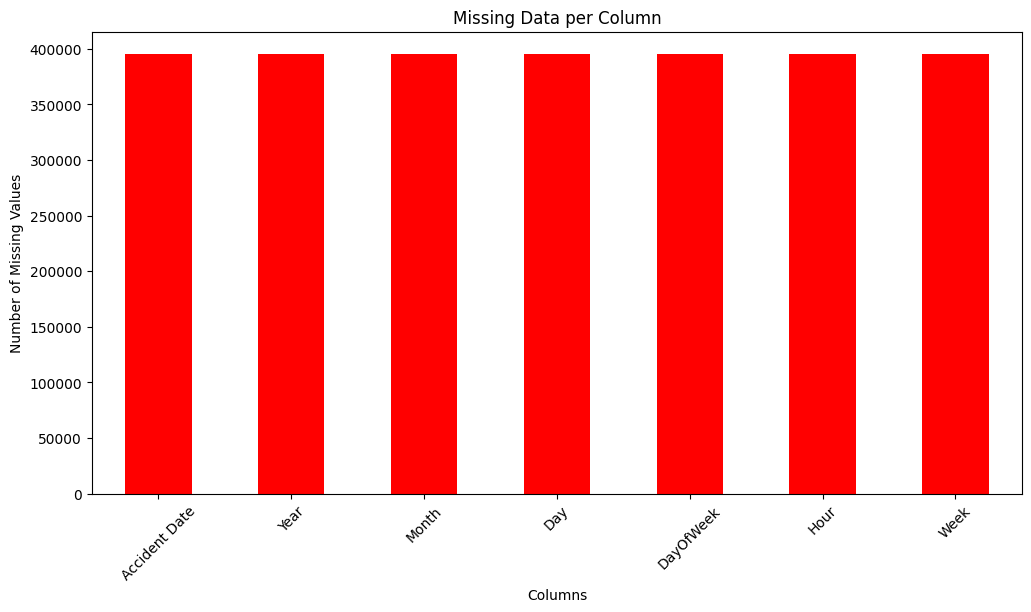

In [57]:
# print("Missing Data Summary:")
# acd.isnull().sum()

missing_summary = acd.isnull().sum()

plt.figure(figsize=(12, 6))
missing_summary[missing_summary > 0].plot(kind="bar", color="red")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Data per Column")
plt.xticks(rotation=45)
plt.show()


<h1>Insight No. 15</h1>
<h2>Most Accident-Prone Days</h2>

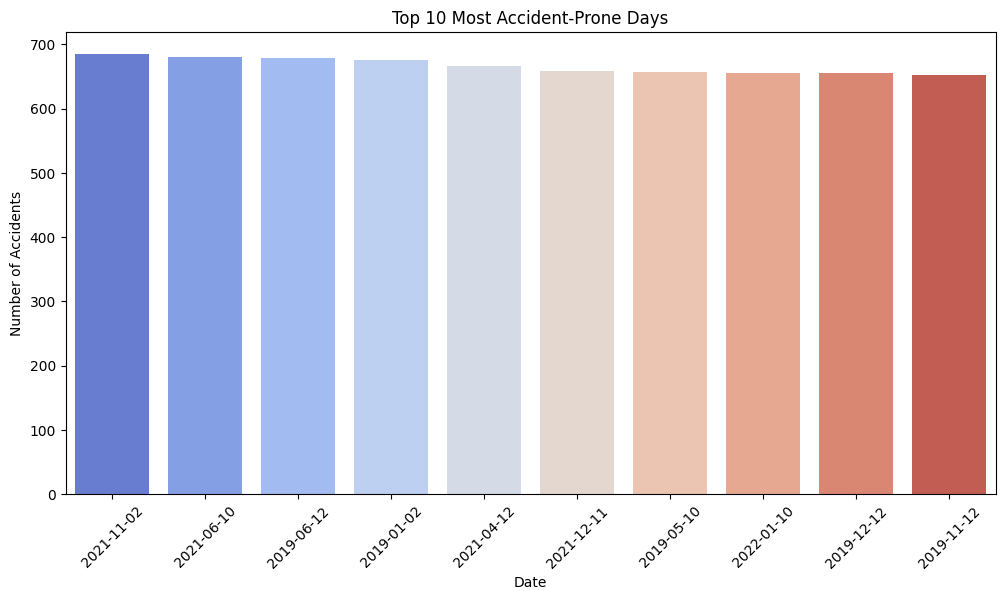

In [54]:
# acd['Accident Date'].value_counts()

acd['Accident Date'] = pd.to_datetime(acd['Accident Date'])


accident_counts = acd['Accident Date'].value_counts().head(10) 
plt.figure(figsize=(12, 6))
sns.barplot(x=accident_counts.index, y=accident_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of Accidents")
plt.title("Top 10 Most Accident-Prone Days")
plt.show()

<h1>Insight No. 16</h1>
<h2>Highest Casualty Accidents</h2>

In [ ]:
acd[['Accident Date', 'District Area', 'Number_of_Casualties']]

<h1>Insight No. 17</h1>
<h2>Accidents per Year</h2>

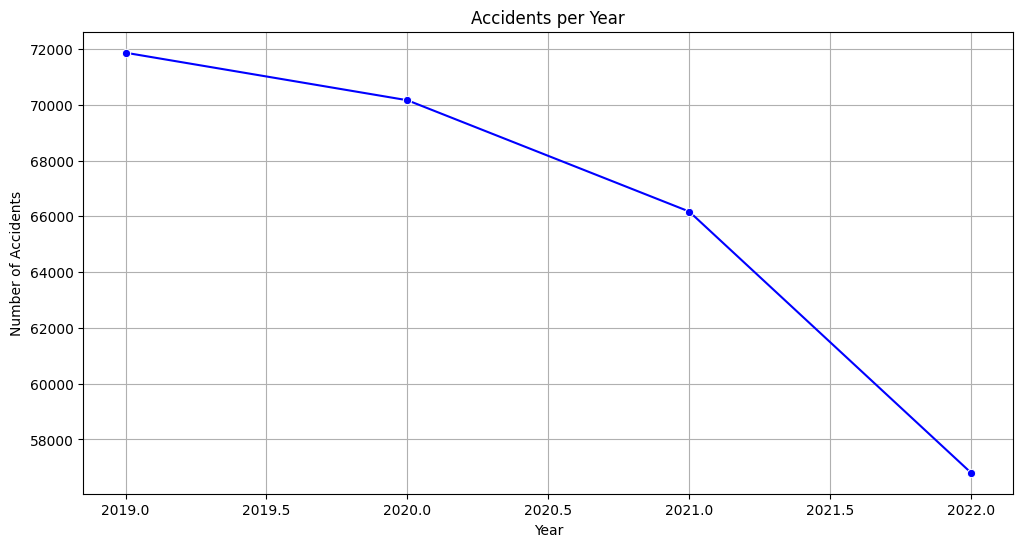

In [50]:
# acd['Year'].value_counts().sort_index()

acd['Year'] = acd['Accident Date'].dt.year

accidents_per_year = acd['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values, marker="o", color="b")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Accidents per Year")
plt.grid(True)
plt.show()


<h1>Insight No. 18</h1>
<h2>Accidents per Day of the Week</h2>

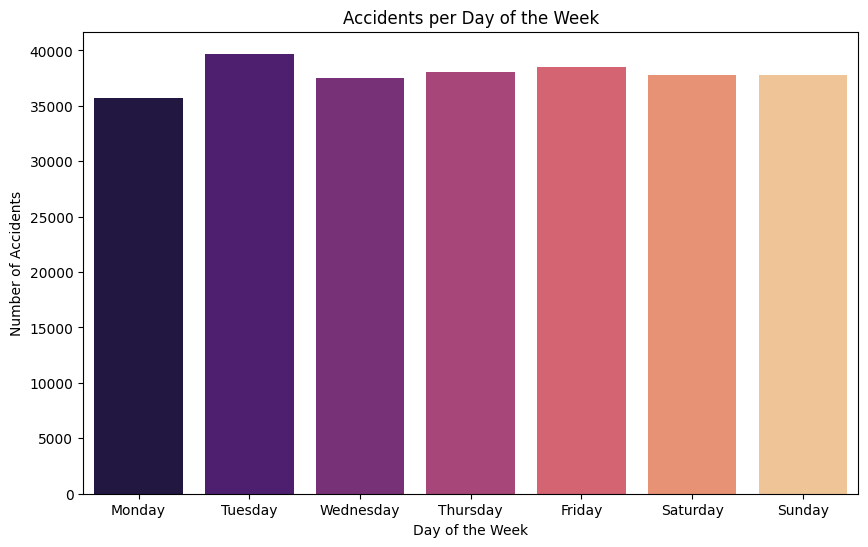

In [51]:
# acd['DayOfWeek'].value_counts()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10, 6))
sns.barplot(x=acd['DayOfWeek'].value_counts().index, y=acd['DayOfWeek'].value_counts().values, order=day_order, palette="magma")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.title("Accidents per Day of the Week")
plt.show()


<h1>Insight No. 19</h1>
<h2>Accidents by Hour of the Day</h2>

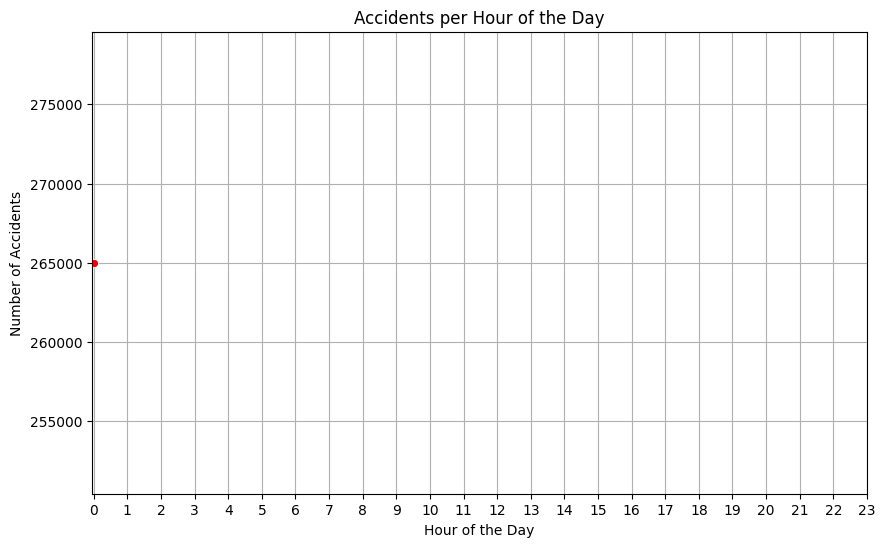

In [52]:
# acd['Hour'].value_counts()

plt.figure(figsize=(10, 6))
sns.lineplot(x=acd['Hour'].value_counts().sort_index().index, y=acd['Hour'].value_counts().sort_index().values, marker="o", color="r")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.title("Accidents per Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


<h1>Insight No. 20</h1>
<h2>Most Accident-Prone Week</h2>

<h1>Insight No. 20</h1>
<h2>Most Accident-Prone Week</h2>

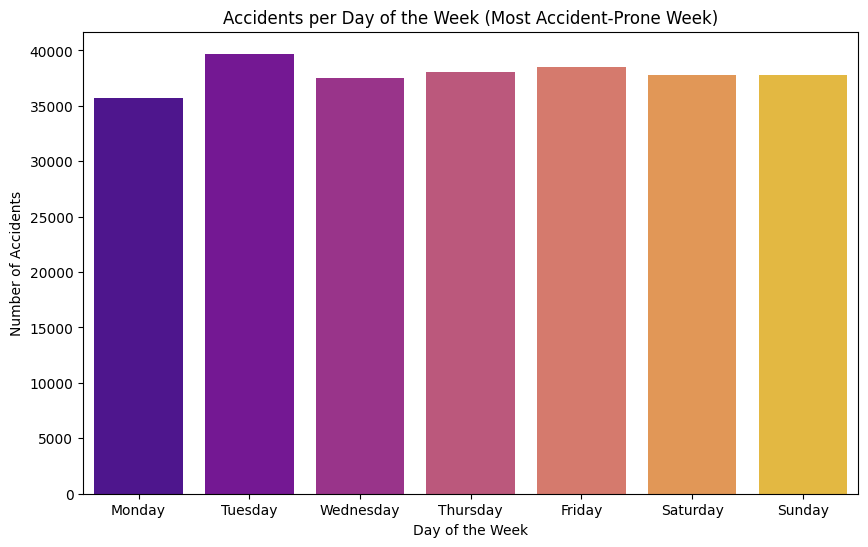

In [59]:
# acd['DayOfWeek'].value_counts()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
accident_counts = acd['DayOfWeek'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=accident_counts.index, y=accident_counts.values, order=day_order, palette="plasma")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.title("Accidents per Day of the Week (Most Accident-Prone Week)")
plt.show()

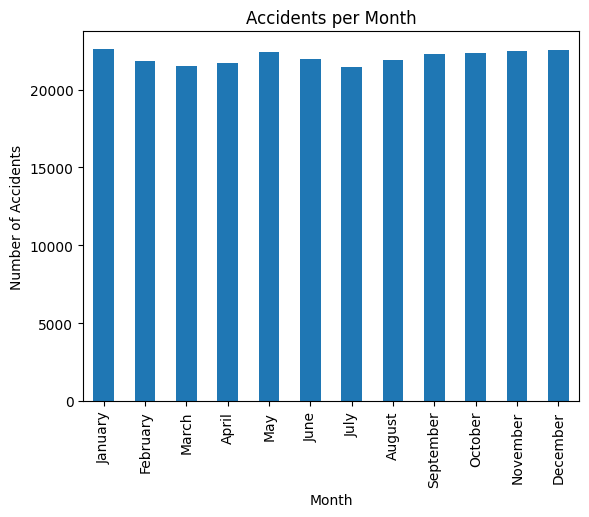

In [58]:
accidents_per_month = acd['Month'].value_counts().sort_index()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


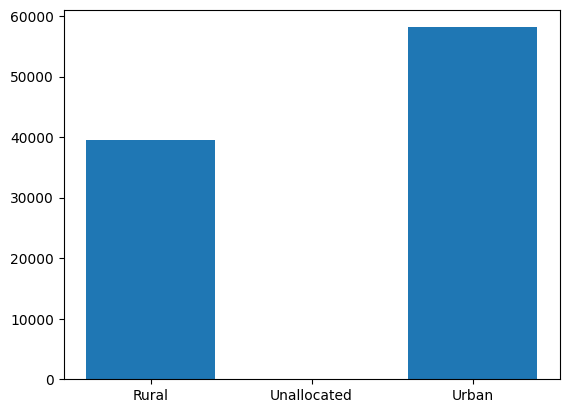

In [47]:
casualties_per_area = df_2019.groupby(['Urban_or_Rural_Area'])['Number_of_Casualties'].sum().reset_index()

casualties_per_area.columns = ['area','casualties']

y = casualties_per_area['area']
x = casualties_per_area['casualties']

plt.bar(y,x)
plt.show()

<h1>Seasonal Analysis</h1>

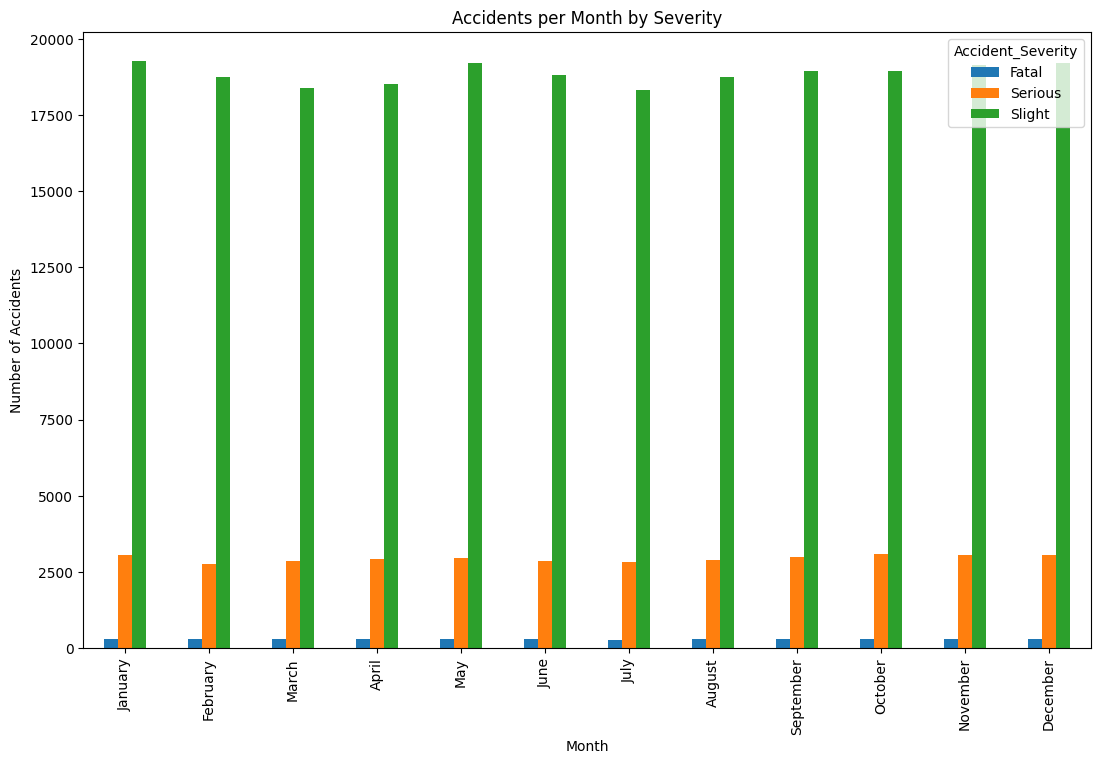

In [48]:
accidents_per_month_severity = acd.groupby(['Month', 'Accident_Severity']).size().unstack()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month_severity.index = accidents_per_month_severity.index.map(month_names)

accidents_per_month_severity.plot(kind='bar') 
plt.title('Accidents per Month by Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()
